In [1]:
import os
print(os.getcwd())

/home/sagemaker-user/DigitalMarketingAIOptimization/notebooks


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Load the preprocessed data
data = pd.read_csv('/home/sagemaker-user/DigitalMarketingAIOptimization/data/processed/combined_ad_data.csv')
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
# Basic statistics
print(data.describe())

                                Date    Impressions       Clicks        Spend  \
count                           1617    1617.000000  1617.000000  1617.000000   
mean   2024-03-31 18:33:10.352504832   67648.497835   425.257267   655.784477   
min              2024-01-01 00:00:00       0.000000     0.000000     0.000000   
25%              2024-02-15 00:00:00    6755.000000     8.000000    24.500000   
50%              2024-04-01 00:00:00   16036.000000   206.000000   119.000000   
75%              2024-05-16 00:00:00   61243.000000   482.000000   790.100000   
max              2024-06-30 00:00:00  698237.000000  3690.000000  6218.300000   
std                              NaN  122213.474024   668.974680  1102.690379   

       Conversions       Revenue         Reach  Channel  Sessions  \
count  1617.000000   1617.000000   1617.000000   1617.0    1617.0   
mean     12.347062   2548.093321   1205.066172      0.0       0.0   
min       0.000000      0.000000      0.000000      0.0       0

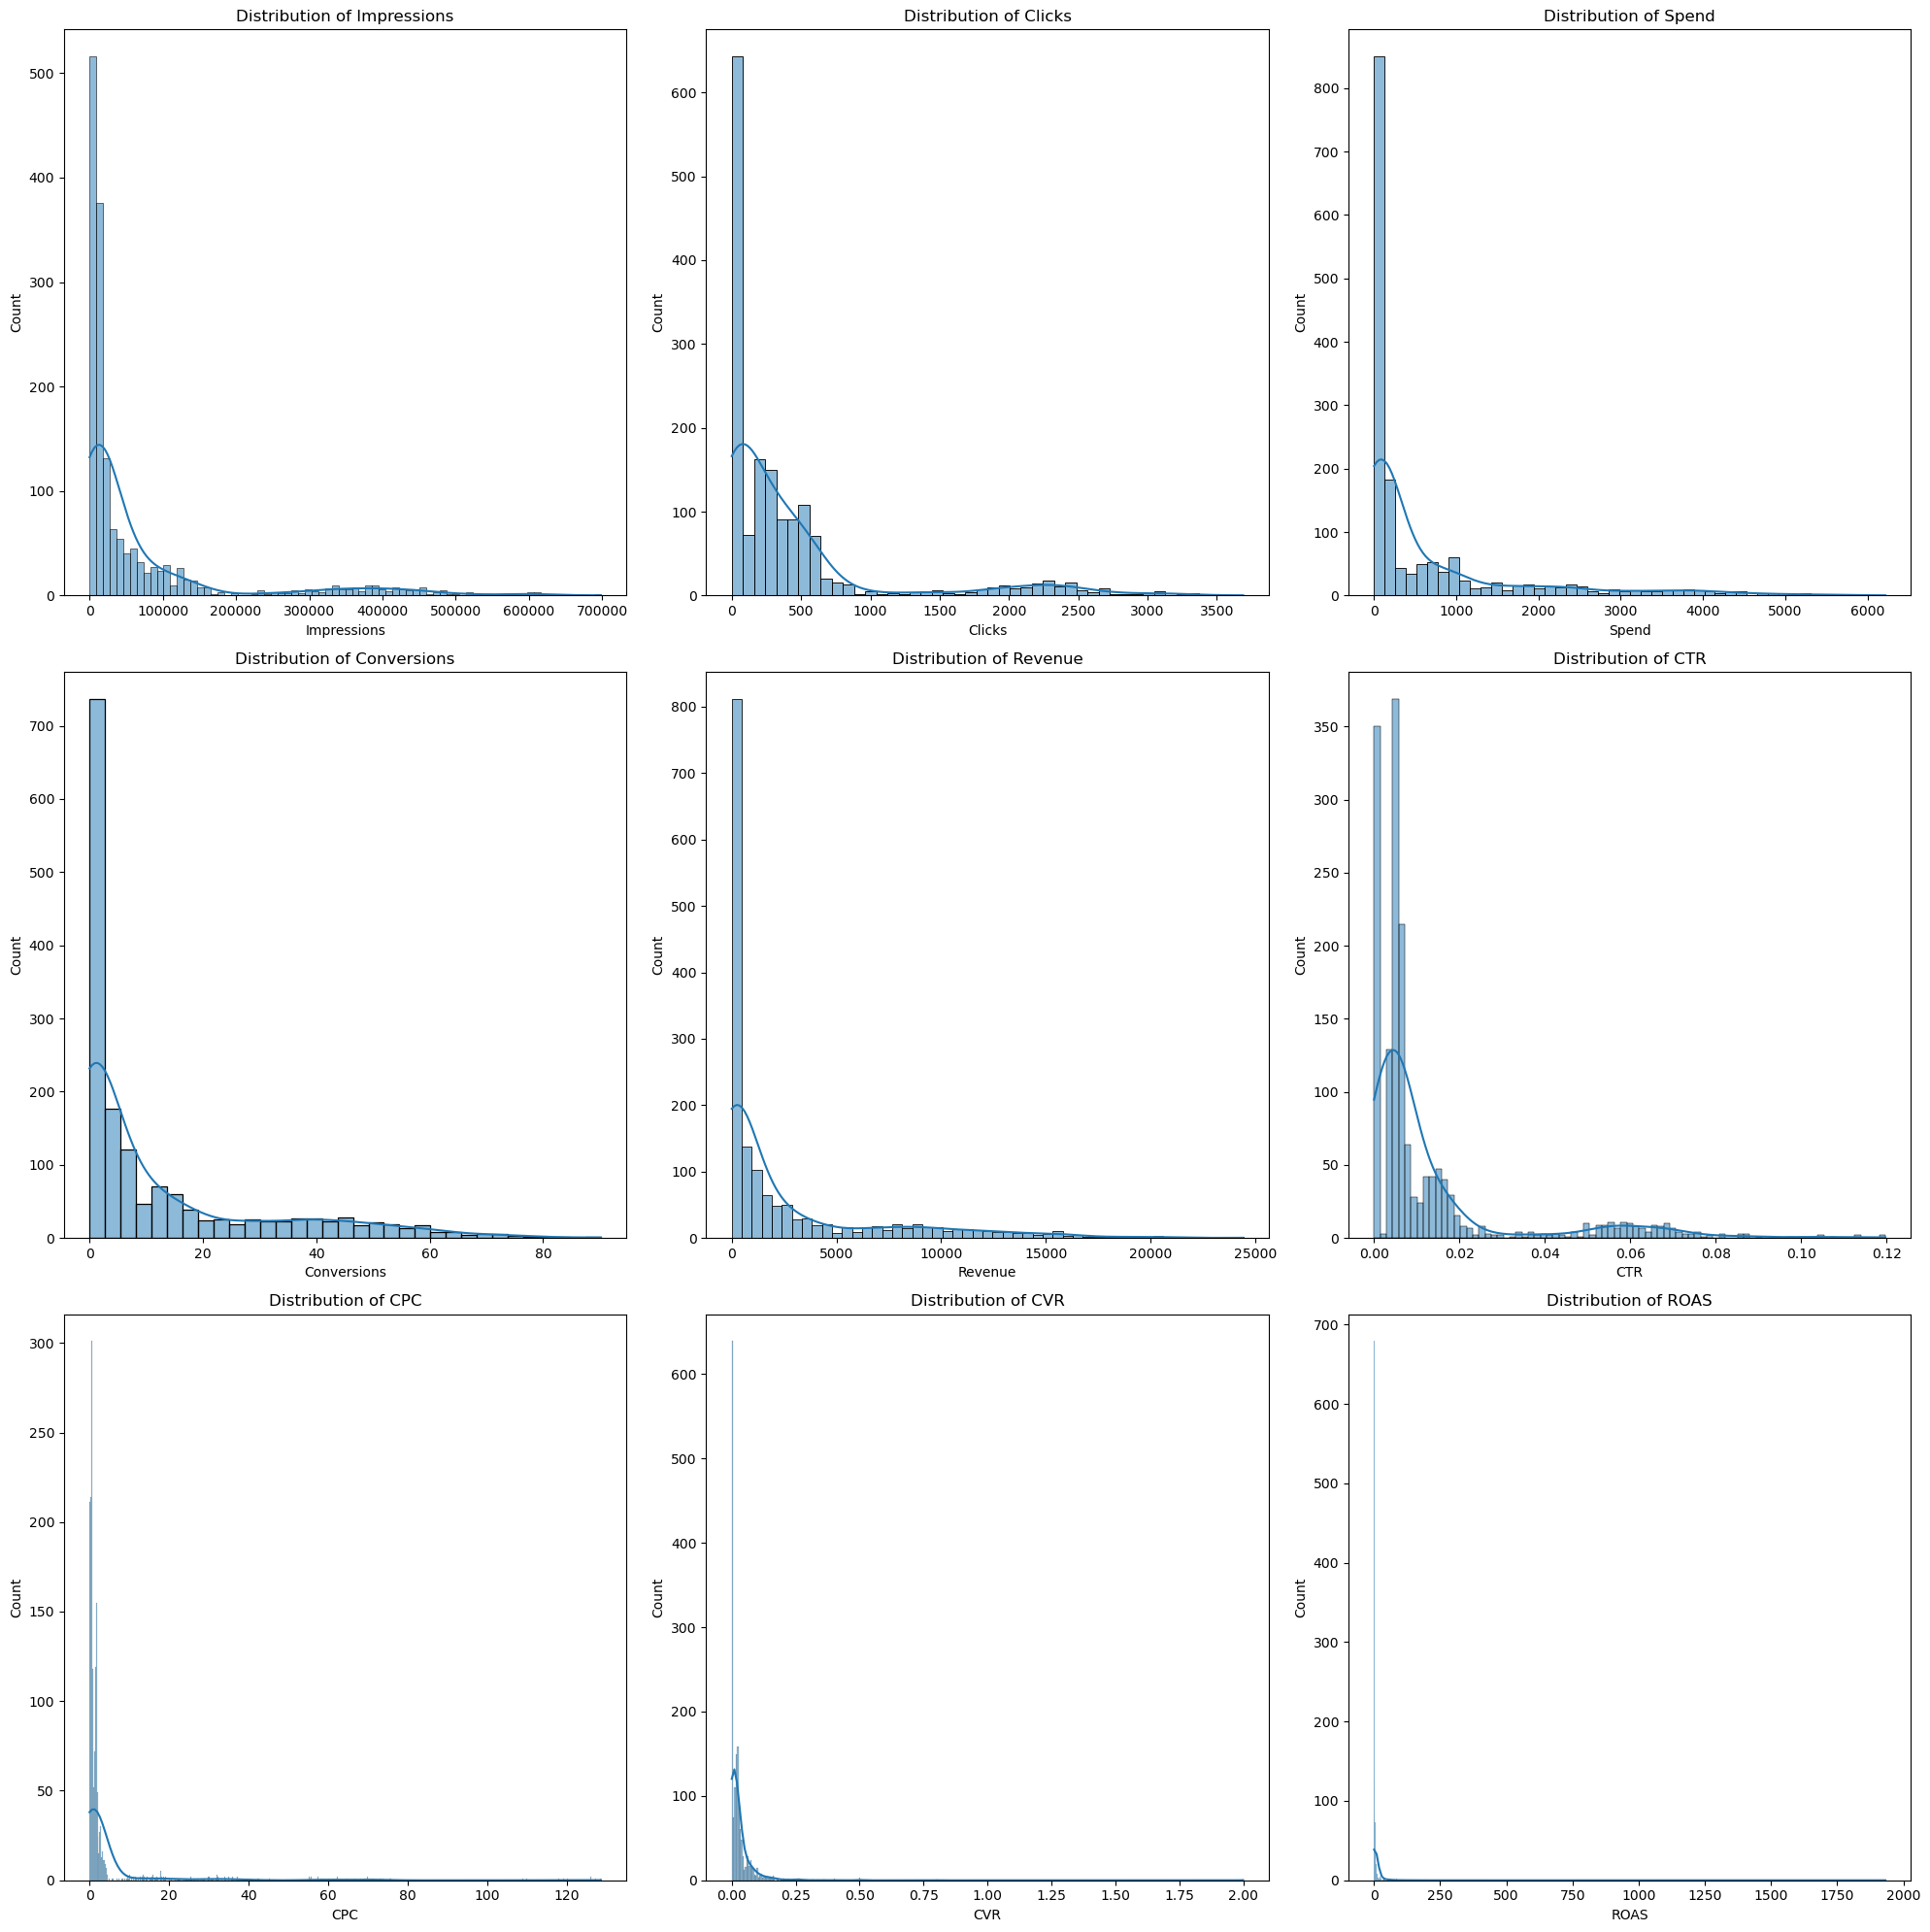

In [5]:
# Distribution of key metrics
metrics = ['Impressions', 'Clicks', 'Spend', 'Conversions', 'Revenue', 'CTR', 'CPC', 'CVR', 'ROAS']
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for i, metric in enumerate(metrics):
    sns.histplot(data[metric], ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Distribution of {metric}')
plt.tight_layout()
plt.savefig("/home/sagemaker-user/DigitalMarketingAIOptimization/plots/distribution_of_key_metrics.png")
plt.show()

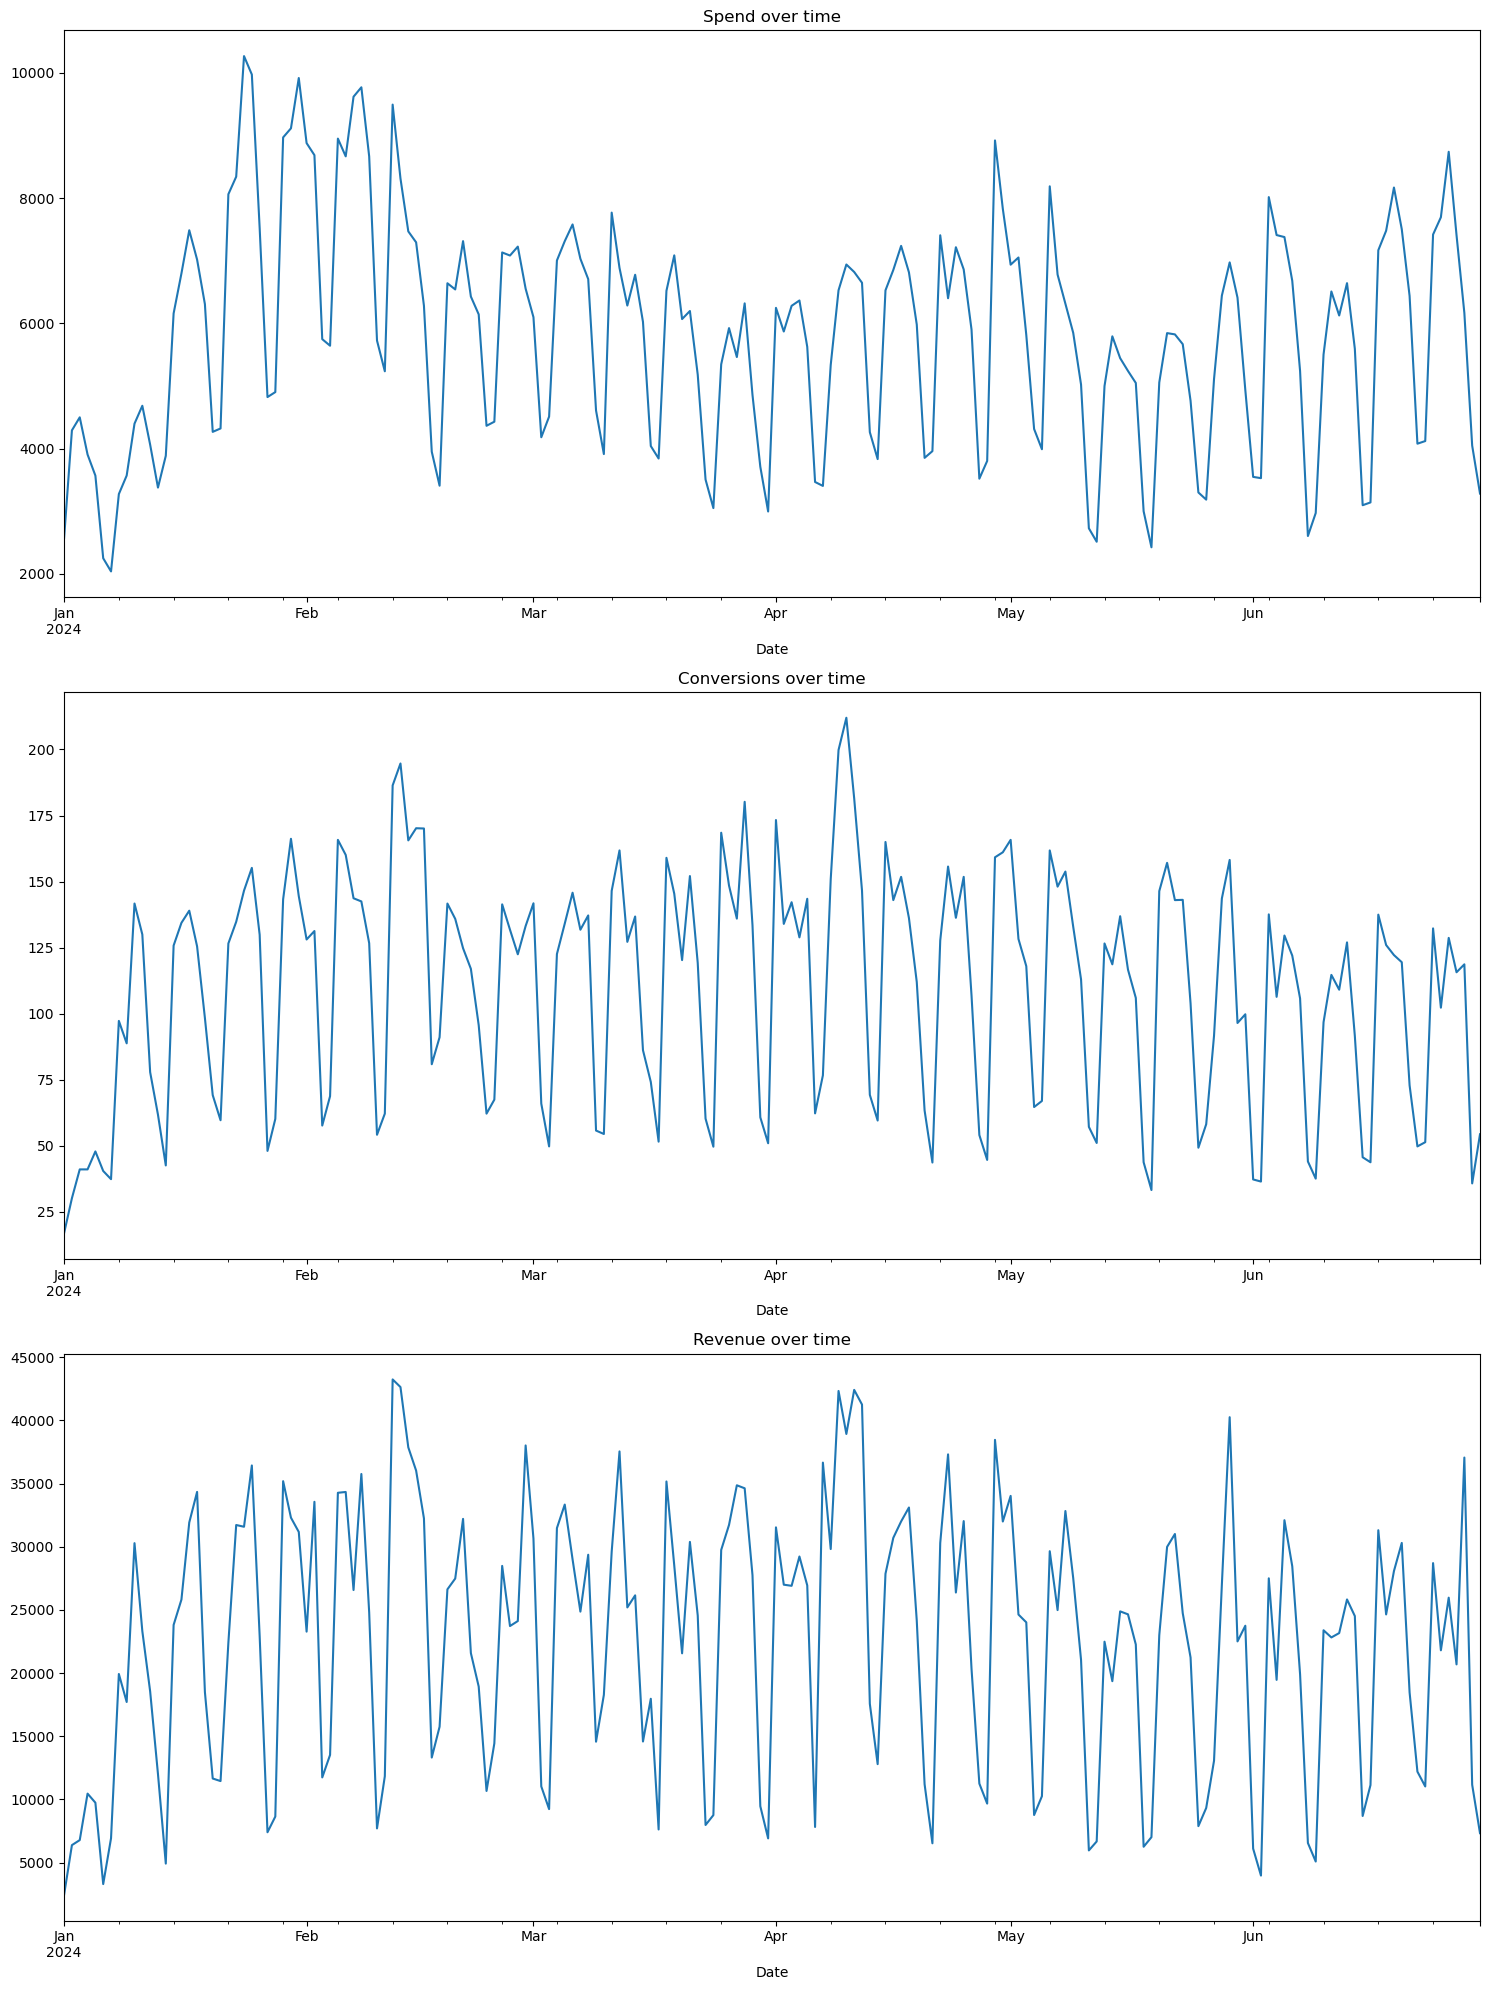

In [6]:
# Time series of key metrics
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
for i, metric in enumerate(['Spend', 'Conversions', 'Revenue']):
    data.groupby('Date')[metric].sum().plot(ax=axes[i])
    axes[i].set_title(f'{metric} over time')
plt.tight_layout()
plt.savefig("/home/sagemaker-user/DigitalMarketingAIOptimization/plots/timeseries_key_metrics.png")
plt.show()

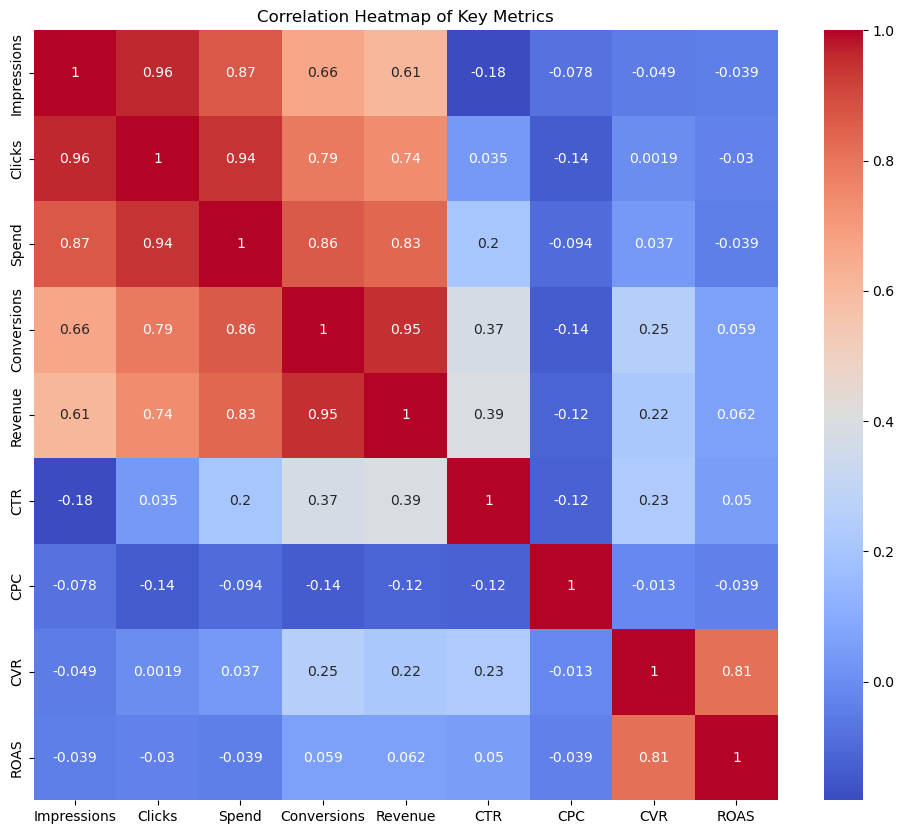

In [7]:
# Correlation heatmap
correlation_matrix = data[metrics].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Metrics')
plt.savefig("/home/sagemaker-user/DigitalMarketingAIOptimization/plots/correlation_heatmap.png")
plt.show()

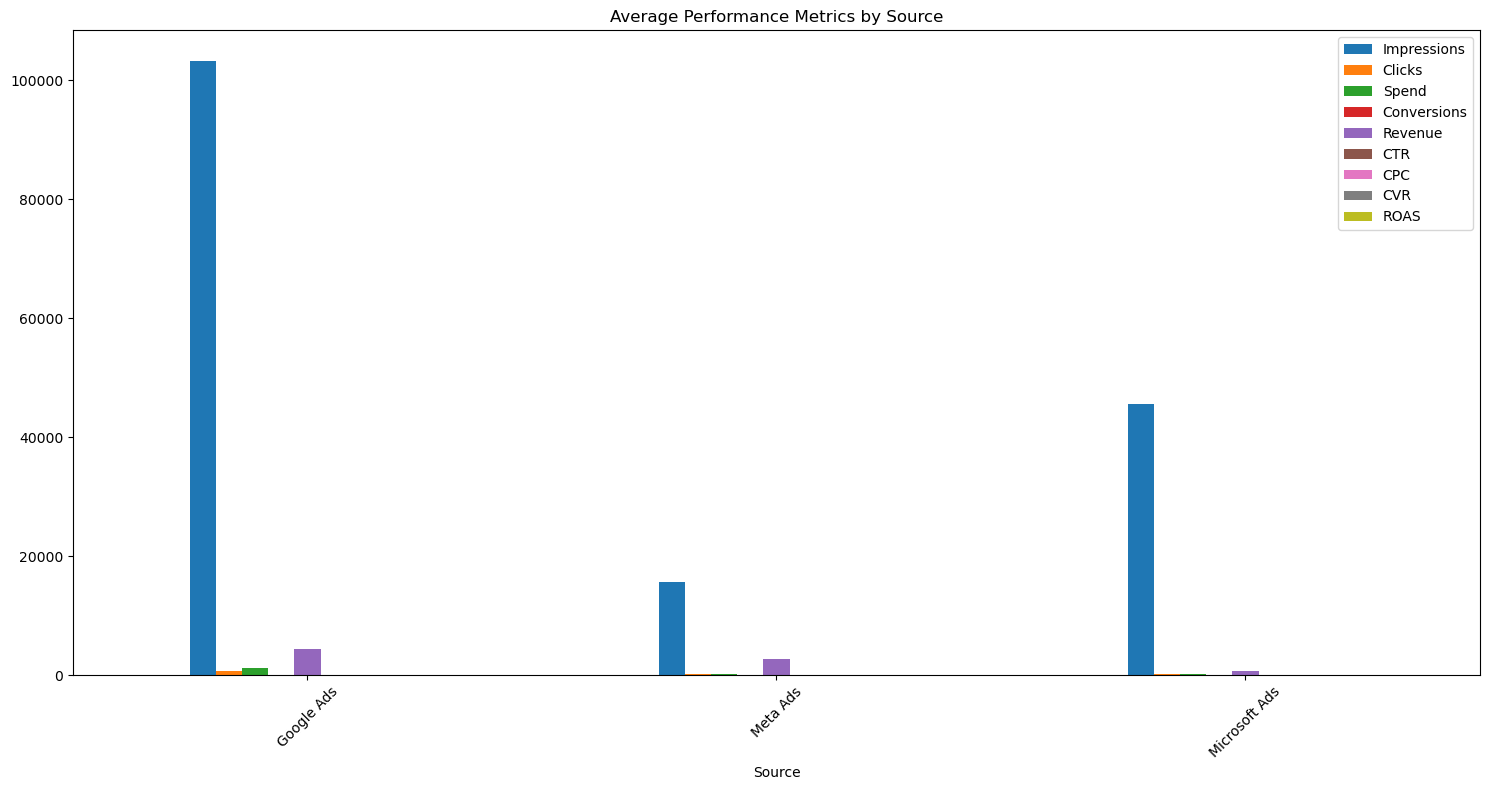

In [8]:
# Performance by Source
data.groupby('Source')[metrics].mean().plot(kind='bar', figsize=(15, 8))
plt.title('Average Performance Metrics by Source')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/home/sagemaker-user/DigitalMarketingAIOptimization/plots/performance_by_score.png")
plt.show()

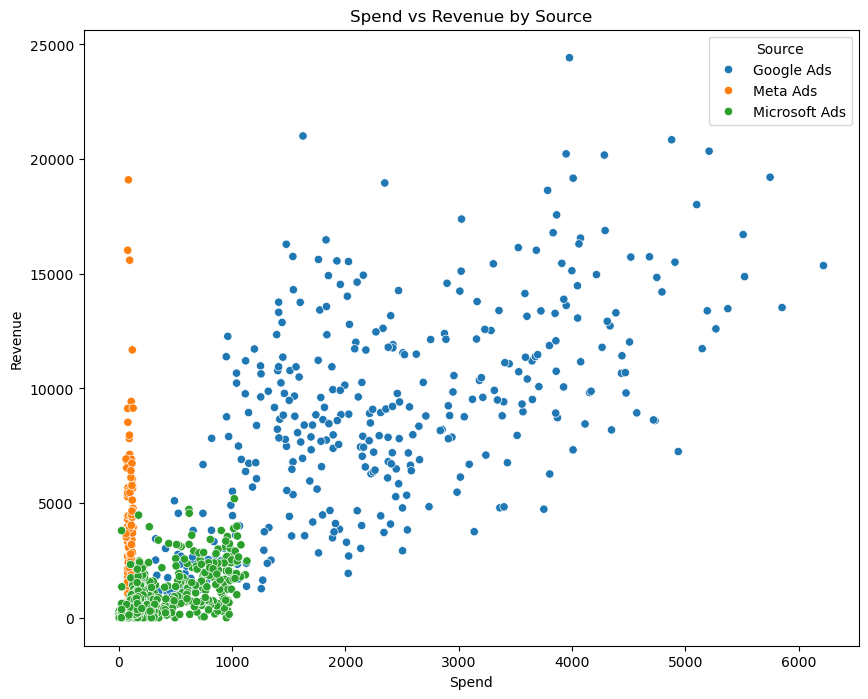

In [9]:
# Scatter plot of Spend vs Revenue
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Spend', y='Revenue', hue='Source')
plt.title('Spend vs Revenue by Source')
plt.savefig("/home/sagemaker-user/DigitalMarketingAIOptimization/plots/spend_vs_revenue_by_source.png")
plt.show()

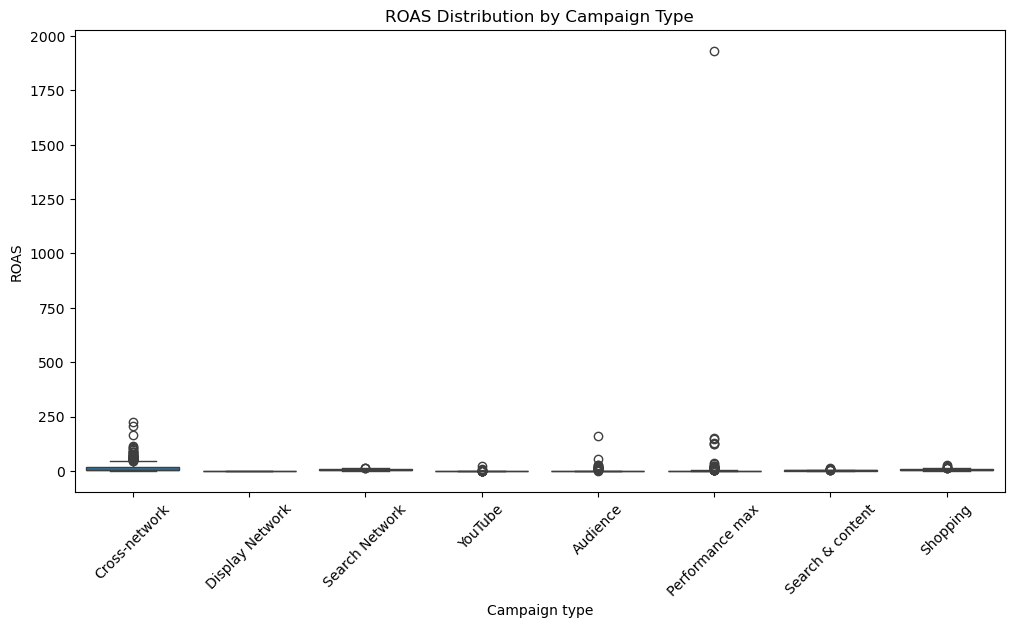

In [10]:
# Box plot of ROAS by Campaign type
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Campaign type', y='ROAS')
plt.title('ROAS Distribution by Campaign Type')
plt.xticks(rotation=45)
plt.savefig("/home/sagemaker-user/DigitalMarketingAIOptimization/plots/ROAS_campaign_wise.png")
plt.show()